Importing all Required libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing and Clustering
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

# Time Series Analysis
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
# from prophet import Prophet  # Uncomment if using Prophet

# Dashboard (if applicable)
import streamlit as st

# Configuration
import warnings
warnings.filterwarnings('ignore')
plt.style.use('seaborn-v0_8') # or 'ggplot'

Importing dataset

In [2]:
import pandas as pd

# Define the file path
file_path = './final-greenhouse-gas-emissions-tables-2023.xlsx'

# --- Section 1: UK Territorial Emissions ---
df_table_1_1 = pd.read_excel(file_path, sheet_name='1.1', header=5) # Emissions by gas
df_table_1_2 = pd.read_excel(file_path, sheet_name='1.2', header=5) # Emissions by source category
df_table_1_3 = pd.read_excel(file_path, sheet_name='1.3', header=5) # CO2 by source
df_table_1_4 = pd.read_excel(file_path, sheet_name='1.4', header=5) # CH4 by source
df_table_1_5 = pd.read_excel(file_path, sheet_name='1.5', header=5) # N2O by source
df_table_1_6 = pd.read_excel(file_path, sheet_name='1.6', header=5) # F-gases by source
df_table_1_7 = pd.read_excel(file_path, sheet_name='1.7', header=5) # Emissions by fuel type

# --- Section 3: Geographical Coverage & International Reporting ---
df_table_3_1 = pd.read_excel(file_path, sheet_name='3.1', header=5) # Geo coverage (UK, Crown Dependencies, etc.)
df_table_3_2 = pd.read_excel(file_path, sheet_name='3.2', header=5) # IPCC categories (bunkers excluded)
df_table_3_3 = pd.read_excel(file_path, sheet_name='3.3', header=5) # IPCC categories (bunkers included)
df_table_3_4 = pd.read_excel(file_path, sheet_name='3.4', header=5) # End user emissions (summary)

# --- Section 4: Estimated Emissions by End User ---
df_table_4_1 = pd.read_excel(file_path, sheet_name='4.1', header=5) # Emissions by end user category
df_table_4_2 = pd.read_excel(file_path, sheet_name='4.2', header=5) # CO2 by end user category

# --- Section 5: Indirect Emissions from Electricity Supply ---
df_table_5_1 = pd.read_excel(file_path, sheet_name='5.1', header=5) # Indirect emissions from electricity

# --- Section 6: Uncertainty and Temperature Adjustment ---
df_table_6_1 = pd.read_excel(file_path, sheet_name='6.1', header=5) # Uncertainty estimates
df_table_6_2 = pd.read_excel(file_path, sheet_name='6.2', header=5) # Temperature adjusted emissions (Total)
df_table_6_3 = pd.read_excel(file_path, sheet_name='6.3', header=5) # Temperature adjusted emissions (CO2)
df_table_6_4 = pd.read_excel(file_path, sheet_name='6.4', header=5) # Temperature adjusted emissions (Sector)


Viewing imported data and verifying structure

In [3]:
df_table_1_1.head(8)

,Gas,1990,1991,1992,1993,1994,1995,1996,1997,1998,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Net CO2 emissions (emissions minus removals),603.338717,610.422743,593.896669,579.193090,572.878729,565.012120,584.625898,560.574983,564.759793,...,432.028703,413.028690,389.424015,377.092187,371.386007,355.608189,320.456684,336.431050,320.775212,302.818746
1,Methane (CH4),148.514709,149.522883,149.334286,147.839745,140.211634,141.616469,141.129088,138.514419,135.452159,...,66.675634,65.472085,63.073572,63.352133,62.753926,62.407610,59.995133,58.724439,58.085237,57.015458
2,Nitrous oxide (N2O),44.070455,44.179741,39.696197,35.888556,36.484385,35.260943,35.237381,35.482751,35.512390,...,20.197029,20.076479,19.618563,19.884393,19.761921,19.814407,18.779892,19.153754,18.267651,18.093685
3,Hydrofluorocarbons (HFCs),12.061102,12.560947,13.060897,13.702254,14.455132,15.486111,16.208793,18.017209,14.908096,...,11.135611,10.949807,10.614142,10.121289,9.669522,8.985809,8.159768,7.584366,7.068989,6.597489
4,Perfluorocarbons (PFCs),1.483661,1.243053,0.617641,0.538701,0.546409,0.533270,0.531929,0.446926,0.435289,...,0.237828,0.274428,0.282656,0.399671,0.143011,0.202359,0.158298,0.194398,0.151673,0.145323
5,Sulphur hexafluoride (SF6),1.242920,1.303338,1.369572,1.198224,1.244248,1.290991,1.338419,1.311792,1.360703,...,0.444232,0.426419,0.458387,0.460093,0.565037,0.497197,0.425406,0.387500,0.333443,0.301792
6,Nitrogen trifluoride (NF3),0.000110,0.000130,0.000154,0.000183,0.000216,0.000256,0.000303,0.000359,0.000413,...,0.000048,0.000040,0.000031,0.000027,0.000043,0.000047,0.000058,0.000063,0.000063,0.000063
7,Total greenhouse gas emissions,810.711674,819.232836,797.975417,778.360752,765.820754,759.200162,779.071812,754.348439,752.428844,...,530.719086,510.227946,483.471366,471.309792,464.279467,447.515616,407.975239,422.475570,404.682268,384.972556


In [4]:
df_table_1_2.head(8)

,TES sector,TES subsector,TES category,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Electricity supply,Power stations,Power stations - coal,184.142777,185.001297,172.887545,143.934849,135.862143,127.881792,120.242266,...,86.253263,65.753866,27.319347,19.691049,14.749900,6.506485,5.238031,5.780038,5.073003,3.240265
1,NaN,NaN,Power stations - petroleum,19.680780,15.371796,12.760248,12.147797,9.565111,9.253208,8.393914,...,0.732905,0.787786,0.857200,0.634603,0.594929,0.484748,0.430770,0.448437,0.324260,0.255153
2,NaN,NaN,Power stations - gas,0.016283,0.037101,2.631205,14.618897,20.790567,25.894580,33.997377,...,34.759965,34.058639,49.726164,47.298711,45.186924,44.931248,37.774388,41.735205,42.930678,33.275492
3,NaN,NaN,Power stations - municipal solid waste,0.151059,0.152607,0.185938,0.257897,0.415823,0.430076,0.444653,...,2.506879,3.319463,4.092349,4.337025,5.010083,5.580779,5.730341,6.421064,6.395765,6.865047
4,NaN,NaN,Power stations - other fuel,0.000000,0.000035,0.001250,0.003763,0.098338,0.098366,0.149869,...,0.199785,0.372661,0.265305,0.268345,0.310310,0.348116,0.356450,0.377397,0.319093,0.297540
5,Electricity supply total,NaN,Total,203.990898,200.562835,188.466186,170.963203,166.731982,163.558023,163.228080,...,124.452796,104.292415,82.260366,72.229733,65.852146,57.851376,49.529980,54.762141,55.042799,43.933497
6,Fuel supply,Oil and gas supply,Gas platforms,2.509465,2.693980,2.845188,3.055706,2.576585,2.797380,3.189629,...,2.915374,3.084269,2.768932,2.668446,2.437307,2.591965,2.530101,2.004388,2.247381,2.141955
7,NaN,NaN,Gas - venting,0.352792,0.392307,0.397203,0.463983,0.494155,0.628062,0.551572,...,0.503418,0.471980,0.376852,0.312603,0.374516,0.302792,0.245389,0.270478,0.160602,0.126765


In [5]:
df_table_1_3.head(8)

,TES sector,TES subsector,TES category,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Electricity supply,Power stations,Power stations - coal,183.149813,184.014756,171.961528,143.163908,135.132650,127.184859,119.599699,...,85.792037,65.403127,27.175499,19.587071,14.671095,6.472107,5.210452,5.749244,5.045944,3.223112
1,NaN,NaN,Power stations - petroleum,19.615757,15.320372,12.716530,12.105775,9.531078,9.219519,8.362977,...,0.728759,0.783608,0.852812,0.630877,0.591509,0.481710,0.428175,0.445778,0.322062,0.252968
2,NaN,NaN,Power stations - gas,0.015957,0.036700,2.628670,14.605424,20.771254,25.870350,33.965319,...,34.722331,34.021782,49.674228,47.249522,45.139975,44.885568,37.735565,41.692628,42.887185,33.241486
3,NaN,NaN,Power stations - municipal solid waste,0.143618,0.145090,0.176780,0.245194,0.395341,0.408891,0.422750,...,2.413218,3.195317,3.939207,4.174703,4.822124,5.371409,5.515360,6.185881,6.161659,6.613335
4,NaN,NaN,Power stations - other fuel,0.000000,0.000000,0.000000,0.000000,0.090125,0.090125,0.140195,...,0.000000,0.108391,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,Electricity supply total,NaN,Total,202.925145,199.516919,187.483507,170.120300,165.920448,162.773745,162.490941,...,123.656345,103.512226,81.641747,71.642174,65.224703,57.210794,48.889552,54.073532,54.416849,43.330901
6,Fuel supply,Oil and gas supply,Gas platforms,1.825917,2.043064,2.180500,2.524732,2.200776,2.365373,2.788876,...,2.797866,2.926669,2.620874,2.532564,2.302330,2.432304,2.401606,1.919571,2.146316,2.036477
7,NaN,NaN,Gas - venting,0.000743,0.000826,0.000837,0.000977,0.001041,0.001690,0.001069,...,0.000280,0.007944,0.006051,0.022369,0.049428,0.003632,0.000962,0.000018,0.000459,0.000844


In [6]:
df_table_3_1.head(8)

,Geographic coverage,LULUCF inclusion,Gas,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United Kingdom only,Excluding net emissions/removals from land use...,Carbon dioxide (CO2),600.202028,607.776843,592.048890,577.906643,572.004478,564.097334,584.659083,...,438.900645,420.037600,396.093739,384.018905,377.713755,362.088705,327.048322,343.189437,327.258541,308.765251
1,NaN,NaN,Methane (CH4),142.944855,143.958580,143.782421,142.292278,134.672605,136.066818,135.595029,...,61.069606,59.849296,57.432133,57.713055,57.062323,56.698045,54.306037,53.027868,52.365844,51.264167
2,NaN,NaN,Nitrous oxide (N2O),42.153125,42.278206,37.816627,34.028621,34.642672,33.431299,33.439367,...,18.859085,18.752073,18.295232,18.575543,18.441022,18.491807,17.476074,17.856918,16.961964,16.778758
3,NaN,NaN,Hydrofluorocarbons (HFCs),12.061102,12.560947,13.060897,13.702254,14.455132,15.486111,16.208793,...,11.135611,10.949807,10.614142,10.121289,9.669522,8.985809,8.159768,7.584366,7.068989,6.597489
4,NaN,NaN,Perfluorocarbons (PFCs),1.483661,1.243053,0.617641,0.538701,0.546409,0.533270,0.531929,...,0.237828,0.274428,0.282656,0.399671,0.143011,0.202359,0.158298,0.194398,0.151673,0.145323
5,NaN,NaN,Sulphur hexafluoride (SF6),1.242920,1.303338,1.369572,1.198224,1.244248,1.290991,1.338419,...,0.444232,0.426419,0.458387,0.460093,0.565037,0.497197,0.425406,0.387500,0.333443,0.301792
6,NaN,NaN,Nitrogen trifluoride (NF3),0.000110,0.000130,0.000154,0.000183,0.000216,0.000256,0.000303,...,0.000048,0.000040,0.000031,0.000027,0.000043,0.000047,0.000058,0.000063,0.000063,0.000063
7,NaN,NaN,Total,800.087802,809.121097,788.696202,769.666904,757.565761,750.906080,771.772923,...,530.647055,510.289663,483.176320,471.288583,463.594712,446.963967,407.573963,422.240549,404.140516,383.852842


In [7]:
df_table_3_2.head(8)

,TES sector,TES subsector,TES category,1990,1991,1992,1993,1994,1995,1996,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Electricity supply,Power stations,Power stations - coal,184.142777,185.001297,172.887545,143.934849,135.862143,127.881792,120.242266,...,86.253263,65.753866,27.319347,19.691049,14.749900,6.506485,5.238031,5.780038,5.073003,3.240265
1,NaN,NaN,Power stations - petroleum,20.861901,16.601037,14.096599,13.428357,10.894239,10.620729,9.748223,...,1.971431,1.908187,1.928888,1.651871,1.680908,1.590199,1.338070,1.335445,1.268553,1.247538
2,NaN,NaN,Power stations - gas,0.016283,0.037101,2.631205,14.618897,20.790567,25.894580,33.997377,...,34.938632,34.216464,49.910682,47.480784,45.356491,45.178500,38.044818,41.953854,43.218841,33.575399
3,NaN,NaN,Power stations - municipal solid waste,0.256817,0.266715,0.308396,0.388705,0.554981,0.577585,0.600511,...,2.688170,3.509813,4.285480,4.528436,5.197864,5.768549,5.912468,6.584876,6.551380,6.947580
4,NaN,NaN,Power stations - other fuel,0.000000,0.000035,0.001250,0.003763,0.098338,0.098366,0.149869,...,0.199785,0.372661,0.265305,0.268345,0.310310,0.348116,0.356450,0.377397,0.319093,0.297540
5,Electricity supply total,NaN,Total,205.277777,201.906185,189.924994,172.374571,168.200268,165.073052,164.738246,...,126.051281,105.760991,83.709702,73.620485,67.295473,59.391850,50.889837,56.031611,56.430871,45.308321
6,Fuel supply,Oil and gas supply,Gas platforms,2.509465,2.693980,2.845188,3.055706,2.576585,2.797380,3.189629,...,2.915374,3.084269,2.768932,2.668446,2.437307,2.591965,2.530101,2.004388,2.247381,2.141955
7,NaN,NaN,Gas - venting,0.352792,0.392307,0.397203,0.463983,0.494155,0.628062,0.551572,...,0.503418,0.471980,0.376852,0.312603,0.374516,0.302792,0.245389,0.270478,0.160602,0.126765


In [8]:
df_table_3_3.head(8)

,Geographic coverage,Base year,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,United Kingdom,813.234510,810.711674,819.232836,797.975417,778.360752,765.820754,759.200162,779.071812,754.348439,...,530.719086,510.227946,483.471366,471.309792,464.279467,447.515616,407.975239,422.475570,404.682268,384.972556
1,Jersey,0.698336,0.697151,0.705461,0.807859,0.765609,0.803326,0.822137,0.839913,0.839647,...,0.523286,0.491990,0.508524,0.488409,0.478229,0.463611,0.429967,0.420505,0.390324,0.308420
2,Guernsey,0.551905,0.551091,0.624517,0.562196,0.578931,0.582921,0.602652,0.634374,0.650780,...,0.427049,0.366043,0.378494,0.333669,0.378507,0.425627,0.282477,0.284483,0.271834,0.263732
3,Isle of Man,0.579079,0.578423,0.583433,0.582605,0.582928,0.581602,0.612750,0.689070,0.702838,...,0.598725,0.578542,0.604436,0.583814,0.575635,0.605848,0.578037,0.516235,0.572437,0.554141
4,Gibraltar,0.181634,0.181045,0.191717,0.198587,0.171686,0.187009,0.184740,0.179631,0.190836,...,0.301824,0.334090,0.343357,0.300615,0.308331,0.273300,0.243627,0.250540,0.246272,0.209581
5,"Aircraft and shipping between UK, Crown Depend...",0.306299,0.306299,0.279419,0.290024,0.303698,0.290988,0.288768,0.291092,0.304632,...,0.345248,0.335944,0.337624,0.349629,0.307654,0.324184,0.144390,0.198372,0.291593,0.299931
6,Total greenhouse gas emissions reported under ...,815.551764,813.025684,821.617384,800.416688,780.763604,768.266600,761.711209,781.705892,757.037173,...,532.915218,512.334556,485.643801,473.365928,466.327823,449.608186,409.653737,424.145705,406.454728,386.608361
7,Cayman Islands,0.460570,0.460044,0.459629,0.465923,0.474938,0.488944,0.502185,0.518102,0.545447,...,0.961256,1.058760,1.064998,1.125733,1.210400,1.254395,1.102706,1.173040,1.223850,1.304696


In [9]:
df_table_3_4.head(8)

,Fuel group,Fuel,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,Coal,NaN,221.234986,223.823890,209.237314,179.729414,167.393219,153.687333,143.247880,125.808464,...,95.245061,73.242228,34.490530,26.247334,20.917629,11.961590,10.068821,10.414966,9.300633,6.638702
1,Other solid fuels,NaN,14.742806,14.220262,14.897615,15.001449,13.728666,13.830440,14.679779,13.184311,...,8.608213,7.981649,7.443225,7.285852,7.239758,7.078196,6.486969,6.754466,6.911430,6.971402
2,Petroleum,NaN,204.604645,204.180600,203.394194,203.069438,199.547099,194.025008,197.714291,189.964886,...,152.091872,152.884139,156.425167,155.639864,154.488739,149.430761,127.773794,136.705926,135.583742,134.967094
3,NaN,Motor spirit,78.411934,77.466670,77.550746,76.672395,73.781214,71.044585,72.342965,71.784733,...,39.076328,37.685826,37.893094,37.392689,36.750028,37.356936,29.003034,32.237610,34.788813,36.315454
4,NaN,DERV,34.279361,34.396008,35.780147,37.918315,41.436101,43.146658,46.022491,47.953170,...,73.055293,75.078198,78.696434,80.092801,79.562528,75.400492,65.085776,70.017488,68.250367,65.424928
5,NaN,Gas oil,31.911738,32.309874,32.196403,31.985826,32.230215,31.840164,32.699599,31.985320,...,19.294612,22.699723,22.120068,21.467928,19.740420,20.073926,17.913925,18.960970,17.900798,18.278537
6,NaN,Fuel oil,45.421367,45.025893,40.734552,38.346308,34.530227,29.791651,27.510594,20.711633,...,4.499146,3.539377,3.170669,3.459452,3.233749,2.024307,2.139087,2.344195,2.506399,2.056345
7,NaN,Orimulsion,0.340641,0.918633,2.826224,3.111923,2.696561,2.804247,1.916382,0.399979,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [10]:
df_table_4_1.head(8)

,Pollutant,Chemical formula,GWP,1990 emissions (million tonnes CO2 equivalent),2023 emissions (million tonnes CO2 equivalent),Uncertainty in 2023 emissions,Range of uncertainty in 2023 emissions \n\n2.5 percentile,Range of uncertainty in 2023 emissions \n\n97.5 percentile,Percentage change between 1990 and 2023,Range of likely % change between 1990 and 2023\n\n2.5 percentile,Range of likely % change between 1990 and 2023\n\n97.5 percentile
0,Carbon dioxide,CO2,1,606.755996,306.145911,0.020563,299.853844,312.444189,-0.495411,-0.506583,-0.484323
1,Methane,CH4,28,149.117459,57.339180,0.143635,50.395680,66.867475,-0.609949,-0.710813,-0.497531
2,Nitrous oxide,N2O,265,44.263987,18.240825,0.173405,15.757033,22.083147,-0.579611,-0.705175,-0.441474
3,Hydrofluorocarbons,HFCs,"4 - 12,400",12.053603,6.950303,0.058930,6.540150,7.359307,-0.420022,-0.504009,-0.315075
4,Perfluorocarbons,PFCs,"6,630 - 11,100",1.483842,0.145208,0.194697,0.118707,0.175250,-0.901218,-0.924613,-0.871235
5,Sulphur hexafluoride,SF6,23500,1.243013,0.301808,0.060782,0.284385,0.321074,-0.756481,-0.784179,-0.724540
6,Nitrogen trifluoride,NF3,16100,0.000110,0.000063,0.475836,0.000036,0.000096,-0.385101,-0.702369,0.151719
7,All greenhouse gases weighted by GWP,NaN,NaN,814.918010,389.123298,0.027796,379.164577,400.796528,-0.522215,-0.550031,-0.497691


In [11]:
df_table_4_2.head(8)

,TES Sector,1990 emissions (million tonnes CO2 equivalent),2023 emissions (million tonnes CO2 equivalent),Uncertainty in 2023 emissions,Range of uncertainty in 2023 emissions \n\n2.5 percentile,Range of uncertainty in 2023 emissions \n\n97.5 percentile,Percentage change between 1990 and 2023,Range of likely % change between 1990 and 2023\n\n2.5 percentile,Range of likely % change between 1990 and 2023\n\n97.5 percentile
0,Electricity supply,205.291424,45.306747,0.032097,43.858009,46.766473,-0.779264,-0.788262,-0.769909
1,Fuel supply,77.220780,30.085438,0.070869,28.073847,32.338124,-0.609234,-0.656648,-0.555960
2,Domestic transport,130.666966,113.381413,0.017649,111.392217,115.394464,-0.132205,-0.154608,-0.109423
3,Buildings and product uses,110.240223,79.103186,0.030683,76.722044,81.576276,-0.282180,-0.316643,-0.246806
4,Industry,155.427776,53.170622,0.029403,51.601301,54.728075,-0.657244,-0.691066,-0.629826
5,Agriculture,54.855412,46.818241,0.068376,43.673888,50.076371,-0.145722,-0.220489,-0.066435
6,Waste,70.550798,20.119401,0.408534,13.422431,29.861360,-0.696753,-0.846408,-0.461708
7,"Land use, land use change and forestry",10.664631,1.138250,4.015997,-3.424671,5.717747,-0.938445,-1.761190,-0.645061


In [12]:
df_table_5_1.head(8)

,Memo item,Gas,1990,1991,1992,1993,1994,1995,1996,1997,...,2014,2015,2016,2017,2018,2019,2020,2021,2022,2023
0,International aviation bunkers,Carbon dioxide (CO2),15.375465,15.114840,16.748932,17.968345,18.736997,19.939212,21.092336,22.448148,...,32.625062,33.116972,33.764258,36.683029,36.273444,35.718535,15.061249,13.657363,28.113486,32.920944
1,International aviation bunkers,Methane (CH4),0.009292,0.007795,0.007264,0.006928,0.006292,0.006029,0.006062,0.006050,...,0.003288,0.003390,0.003562,0.003684,0.003493,0.003318,0.001224,0.001060,0.002359,0.002412
2,International aviation bunkers,Nitrous oxide (N2O),0.129346,0.127155,0.140903,0.151162,0.157629,0.167744,0.177446,0.188854,...,0.274489,0.278627,0.284068,0.308620,0.305174,0.300505,0.126703,0.115264,0.237486,0.279784
3,International aviation bunkers,Total,15.514103,15.249789,16.897099,18.126435,18.900918,20.112985,21.275845,22.643052,...,32.902839,33.398989,34.051887,36.995333,36.582110,36.022358,15.189176,13.773687,28.353331,33.203140
4,International shipping bunkers,Carbon dioxide (CO2),8.029513,7.872510,8.066402,7.847015,7.341521,7.804515,8.435346,9.358699,...,8.391250,7.989615,8.464882,7.807262,7.794552,7.258961,5.970473,6.146509,6.226774,6.194459
5,International shipping bunkers,Methane (CH4),0.003297,0.003180,0.003249,0.003195,0.002907,0.003206,0.003464,0.003967,...,0.003186,0.002883,0.003056,0.002794,0.002815,0.002566,0.002086,0.002174,0.002251,0.002188
6,International shipping bunkers,Nitrous oxide (N2O),0.100422,0.098332,0.100727,0.098063,0.091561,0.097578,0.105457,0.117274,...,0.104268,0.097183,0.102924,0.094866,0.094730,0.088073,0.072393,0.074564,0.075683,0.075097
7,International shipping bunkers,Total,8.133233,7.974022,8.170378,7.948273,7.435989,7.905298,8.544266,9.479940,...,8.498704,8.089681,8.570862,7.904922,7.892097,7.349600,6.044952,6.223247,6.304708,6.271744


In [13]:
df_table_6_1.head(8)

,TES sector,TES subsector,TES category,CRT category,Source
0,Electricity supply,Power stations,Power stations - coal,1A1ai,Power stations
1,Electricity supply,Power stations,Power stations - petroleum,1A1ai,Power stations
2,Electricity supply,Power stations,Power stations - gas,1A1ai,Power stations
3,Electricity supply,Power stations,Power stations - municipal solid waste,1A1ai,Power stations
4,Electricity supply,Power stations,Power stations - other fuel,1A1ai,Power stations
5,Fuel supply,Oil and gas supply,Gas platforms,1A1cii,Upstream Gas Production - fuel combustion
6,Fuel supply,Oil and gas supply,Gas platforms,1B2bii,Onshore natural gas gathering
7,Fuel supply,Oil and gas supply,Gas platforms,1B2bii,Onshore natural gas production (conventional)


In [14]:
df_table_6_2.head(8)

,TES sector,TES subsector,TES category,CRT category,Methodology,CO2,CH4,N2O,Summary of activity/emissions data sources
0,Electricity supply,Power stations,Power stations - coal,1A1ai,Emission factor * activity,CS,"CS,D","CS,D","Carbon Factors Review (2004), UK and EU ETS da..."
1,Electricity supply,Power stations,Power stations - gas,1A1ai,Emission factor * activity,"CS,D","CS,D","CS,D","DUKES (2024), UK and EU ETS data (EA, SEPA, NI..."
2,Electricity supply,Power stations,Power stations - municipal solid waste,1A1ai,Emission factor * activity,D,D,D,"DUKES (2024), IPCC 2006"
3,Electricity supply,Power stations,Power stations - petroleum,1A1ai,Emission factor * activity,"CS,D","CS,D","CS,D","DUKES (2024), UK and EU ETS data (EA, SEPA, NI..."
4,Electricity supply,Power stations,Power stations - other fuel,1A1ai,Emission factor * activity,"CS,D","CS,D","CS,D","DUKES (2024), UK and EU ETS data (EA, SEPA, NI..."
5,Fuel supply,Oil and gas supply,Gas - flaring,1B2cii2,Operator reported emissions,"CS,PS","CS,PS","CS,PS","Upstream Oil and Gas Inventory Improvement, Ri..."
6,Fuel supply,Oil and gas supply,Gas - venting,1B2ci2,Operator reported emissions,"CS,PS","CS,PS","CS,PS","Upstream Oil and Gas Inventory Improvement, Ri..."
7,Fuel supply,Oil and gas supply,Gas distribution - combustion,1A1ciii,Emission factor * activity; modelled,"CS,D","CS,D","CS,D","Fynes & Sage (1994), Carbon balance for integr..."


In [15]:
df_table_6_3.head(8)

,Coal,Coal.1,Anthracite
0,Coal,Coal,Coal
1,Gaseous fuels,Natural Gas,Natural gas
2,Gaseous fuels,Other gases,Blast furnace gas
3,Gaseous fuels,Other gases,Coke oven gas
4,Gaseous fuels,Other gases,Colliery methane
5,Gaseous fuels,Other gases,Landfill gas
6,Gaseous fuels,Other gases,Sewage gas
7,Gaseous fuels,Other gases,Sour gas


In [16]:
df_table_6_4.head(8)

,Greenhouse gas,NAEI name,Lifetime (years),100 years GWP
0,Carbon dioxide,CO2,50-200,1.000000
1,Carbon dioxide as Carbon,Carbon,50-200,3.666667
2,Methane,CH4,12.4,28.000000
3,Nitrous oxide,N2O,121,265.000000
4,HFC-23,HFC-23,222,12400.000000
5,HFC-32,HFC-32,5.2,677.000000
6,HFC-41,HFC-41,2.8,116.000000
7,HFC-43-10mee,HFC-43-10mee,16.1,1650.000000


In [17]:
pip install nbformat

Note: you may need to restart the kernel to use updated packages.


    extract-msg (<=0.29.*)
                 ~~~~~~~^

[notice] A new release of pip is available: 25.2 -> 25.3
[notice] To update, run: python.exe -m pip install --upgrade pip


EDA and Applying ML techniques

In [18]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# --- 1. Data Loading & Preprocessing (CORRECTED) ---
file_path = 'final-greenhouse-gas-emissions-tables-2023.xlsx'
df_1_1 = pd.read_excel(file_path, sheet_name='1.1', header=5)

# Clean up: Rename first column to Gas
df_1_1.rename(columns={df_1_1.columns[0]: 'Gas'}, inplace=True)
df_1_1.set_index('Gas', inplace=True)

# --- THE FIX: Force column names to Integers ---
# 1. Convert columns to numeric (coerces non-years to NaN)
df_1_1.columns = pd.to_numeric(df_1_1.columns, errors='coerce')

# 2. Drop any columns that are not years (NaNs)
df_1_1 = df_1_1.dropna(axis=1, how='all')

# 3. Convert the column index object to integers
df_1_1.columns = df_1_1.columns.astype(int)

# Remove empty rows
df_1_1.dropna(how='all', inplace=True)

# --- Separation ---
total_row = df_1_1.loc['Total greenhouse gas emissions']
components = df_1_1.drop('Total greenhouse gas emissions')

# Transpose for Time Series Plotting
df_ts = components.T
df_total_ts = total_row.T

# --- DASHBOARD WIDGET SIMULATION ---
start_year = 1990
end_year = 2023
selected_gases = df_ts.columns.tolist()

# Filter data
df_ts_filtered = df_ts.loc[start_year:end_year, selected_gases]
df_total_filtered = df_total_ts.loc[start_year:end_year]

# --- NOW RUN YOUR VISUALIZATIONS BELOW ---
# (The rest of your plotting code will now work because components[1990] exists)

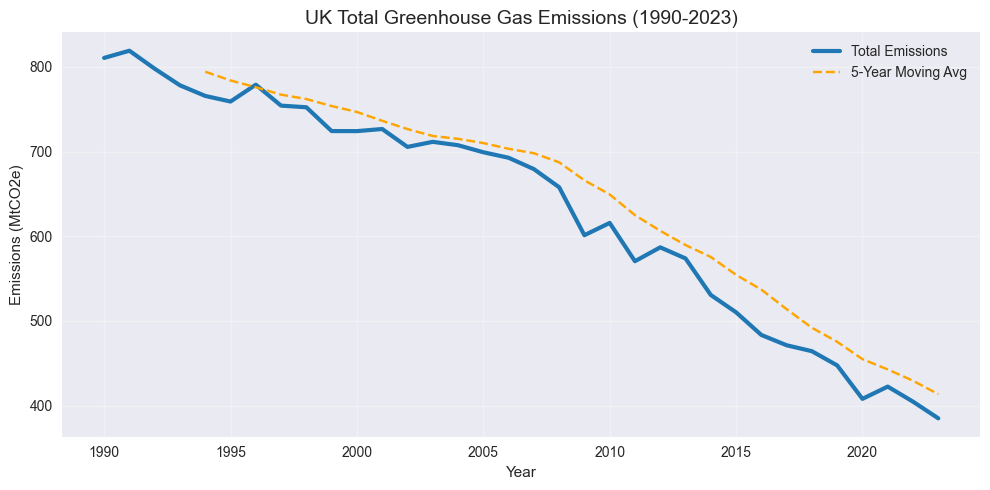

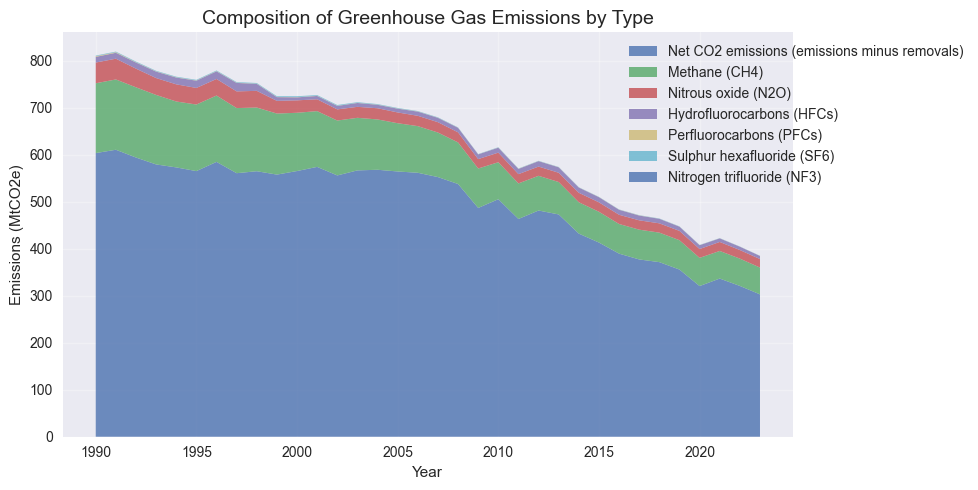

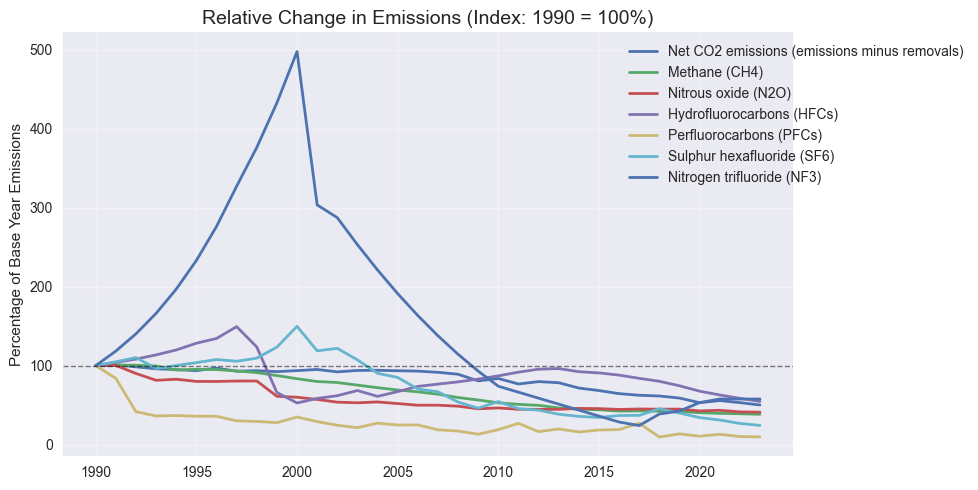

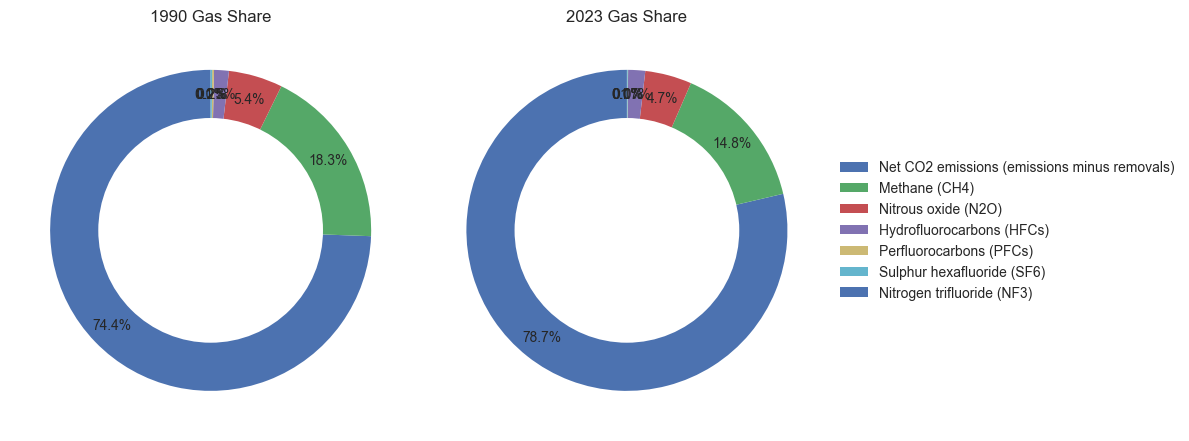

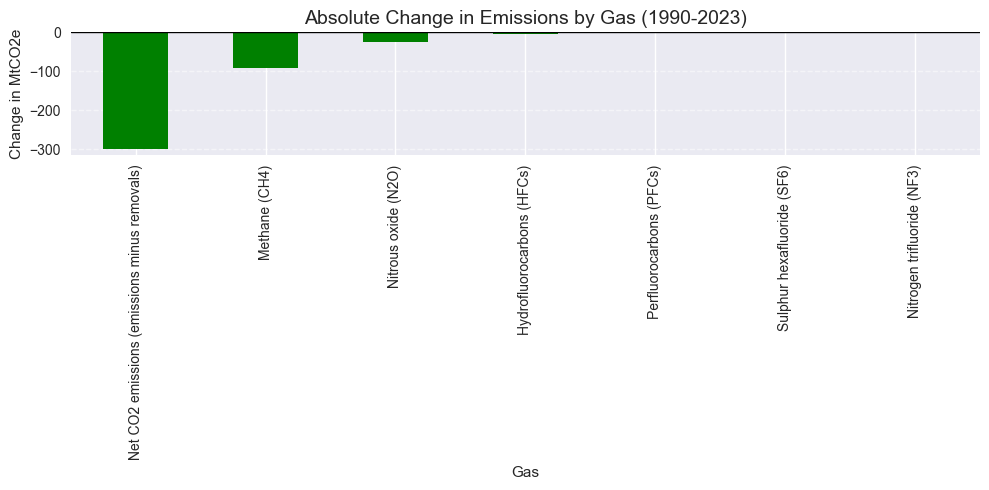

In [19]:
# --- VISUALIZATION 1: Total Emissions Trend (The "Headline" Stat) ---
plt.figure(figsize=(10, 5))
plt.plot(df_total_filtered.index, df_total_filtered.values, 
         color='#1f77b4', linewidth=3, label='Total Emissions')
# Add a trendline (5-year moving average) to show underlying direction
plt.plot(df_total_filtered.index, df_total_filtered.rolling(window=5).mean(), 
         color='orange', linestyle='--', label='5-Year Moving Avg')

plt.title(f'UK Total Greenhouse Gas Emissions ({start_year}-{end_year})', fontsize=14)
plt.ylabel('Emissions (MtCO2e)')
plt.xlabel('Year')
plt.legend()
plt.grid(True, alpha=0.3)
plt.tight_layout()
# st.pyplot(plt) # Use this in Streamlit
plt.show()

# --- VISUALIZATION 2: Stacked Area Chart (The "Mix") ---
# Best for showing how the composition accumulates to the total
plt.figure(figsize=(10, 5))
plt.stackplot(df_ts_filtered.index, df_ts_filtered.T.values, 
              labels=df_ts_filtered.columns, alpha=0.8)

plt.title('Composition of Greenhouse Gas Emissions by Type', fontsize=14)
plt.ylabel('Emissions (MtCO2e)')
plt.xlabel('Year')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1)) # Legend outside
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 3: Normalized Trajectories (1990 = 100) ---
# Best for comparing "Rate of Change" regardless of scale
# (e.g. Did Methane drop faster than CO2?)
df_normalized = df_ts_filtered.div(df_ts_filtered.iloc[0]) * 100

plt.figure(figsize=(10, 5))
for column in df_normalized.columns:
    plt.plot(df_normalized.index, df_normalized[column], linewidth=2, label=column)

plt.axhline(100, color='black', linestyle='--', linewidth=1, alpha=0.5)
plt.title(f'Relative Change in Emissions (Index: {start_year} = 100%)', fontsize=14)
plt.ylabel('Percentage of Base Year Emissions')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# --- VISUALIZATION 4: 1990 vs 2023 Snapshot (Donut Charts) ---
# Comparing the "Pie" at the start vs now
fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# 1990 Donut
axes[0].pie(components[1990], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
axes[0].set_title('1990 Gas Share')
axes[0].add_artist(plt.Circle((0,0),0.70,fc='white')) # Make it a donut

# 2023 Donut
axes[1].pie(components[2023], labels=None, startangle=90, autopct='%1.1f%%', pctdistance=0.85)
axes[1].set_title('2023 Gas Share')
axes[1].add_artist(plt.Circle((0,0),0.70,fc='white'))

# Common Legend
axes[1].legend(components.index, loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# --- VISUALIZATION 5: Waterfall/Bar of Absolute Change ---
# Shows "Who did the heavy lifting?"
change = components[end_year] - components[start_year]
colors = ['green' if x < 0 else 'red' for x in change] # Green for reduction, Red for increase

plt.figure(figsize=(10, 5))
change.sort_values().plot(kind='bar', color=colors)
plt.title(f'Absolute Change in Emissions by Gas ({start_year}-{end_year})', fontsize=14)
plt.ylabel('Change in MtCO2e')
plt.axhline(0, color='black', linewidth=1)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

Table 1.2

Data Loaded & Cleaned.
Years found: [1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022, 2023]
Sectors found: ['Electricity supply', 'Fuel supply', 'Domestic transport', 'Buildings and product uses', 'Industry', 'Agriculture', 'Waste', 'LULUCF']

Data available from 1990 to 2023
Analyzing 5 sectors from 1990 to 2023...


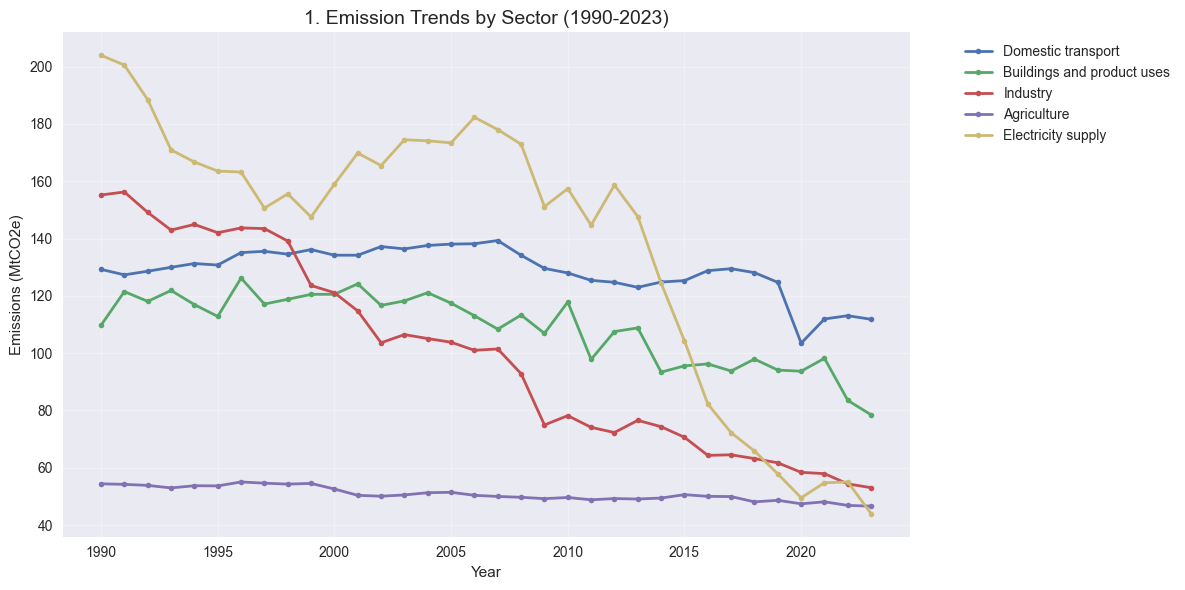

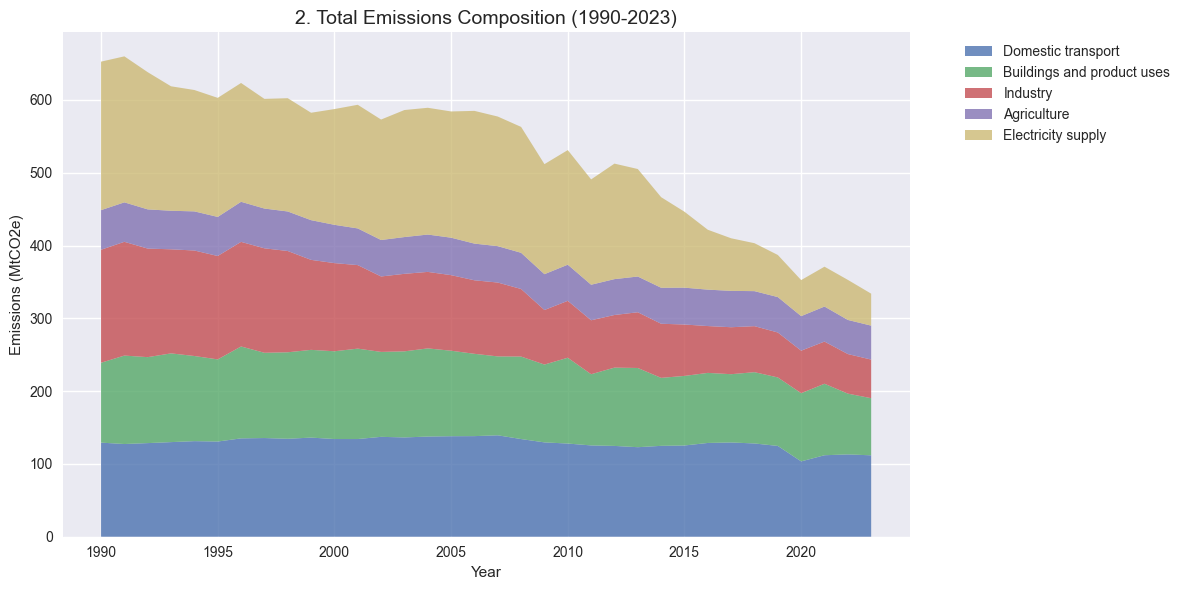

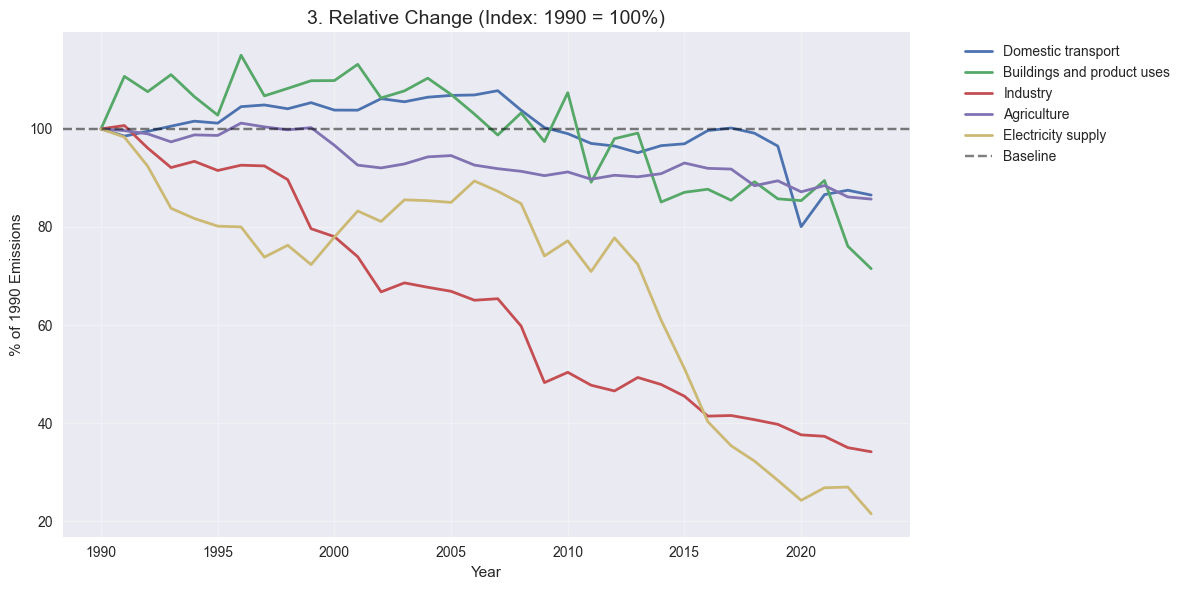

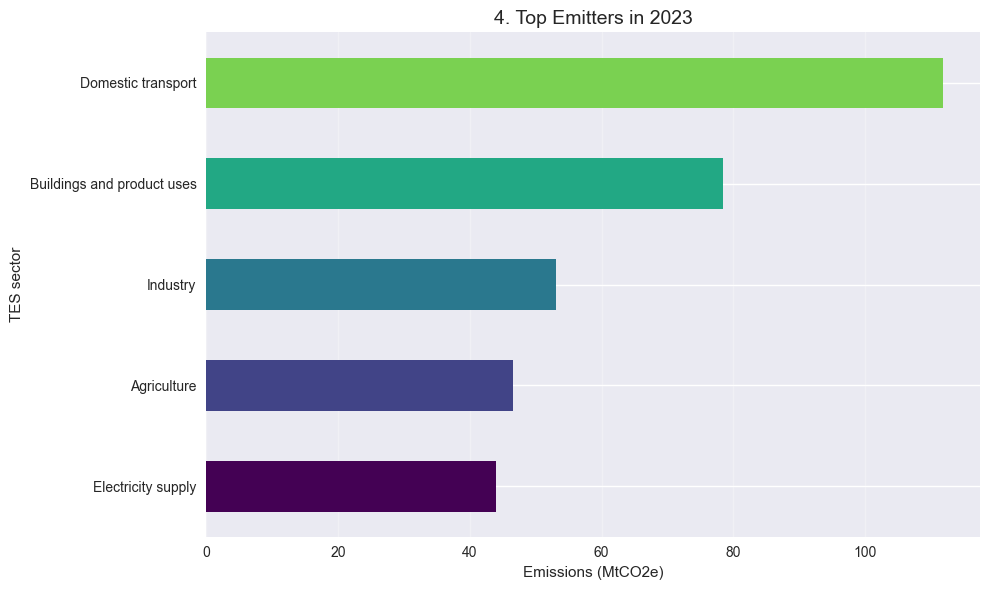

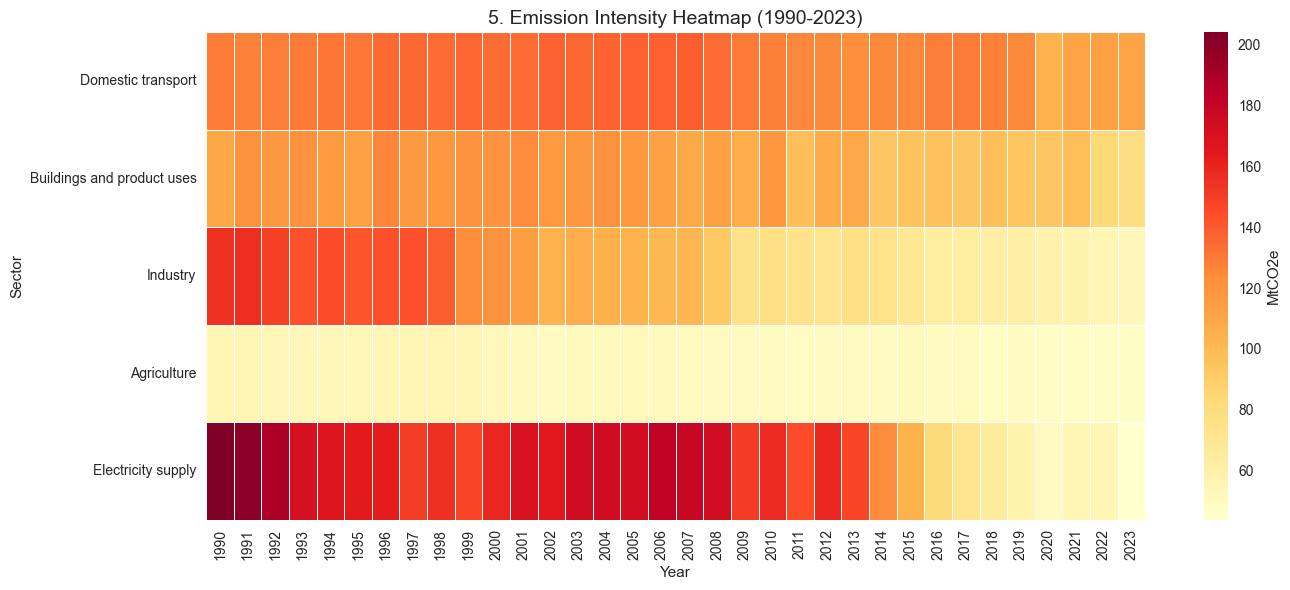

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Data Loading & Cleaning ---
file_path = 'final-greenhouse-gas-emissions-tables-2023.xlsx'

# Load Table 1.2
df_sectors = pd.read_excel(file_path, sheet_name='1.2', header=5)

# Clean column names (remove leading/trailing spaces)
df_sectors.columns = [c if isinstance(c, int) else str(c).strip() for c in df_sectors.columns]

# Filter for Main Sectors
# Logic: Keep rows where 'TES sector' ends in 'total' (e.g., "Energy Supply total")
# but exclude "Grand total".
mask = (df_sectors['TES sector'].str.endswith(' total', na=False)) & \
       (df_sectors['TES sector'] != 'Grand total')
df_clean = df_sectors[mask].copy()

# Clean Sector Names (remove ' total' suffix)
df_clean['TES sector'] = df_clean['TES sector'].str.replace(' total', '')
df_clean.set_index('TES sector', inplace=True)

# --- 1.5 CRITICAL FIX: Handle Year Columns ---
# Keep only columns that look like numbers (years)
year_cols = [c for c in df_clean.columns if str(c).replace('.','').isdigit()]
df_ts = df_clean[year_cols].copy()

# Convert column headers to numeric (floats/integers)
df_ts.columns = pd.to_numeric(df_ts.columns)

# Convert column headers to Integers (This fixes 'KeyError: 2023')
df_ts.columns = df_ts.columns.astype(int)

# Ensure all data values are numeric
df_ts = df_ts.apply(pd.to_numeric, errors='coerce')

print("Data Loaded & Cleaned.")
print("Years found:", df_ts.columns.tolist())
print("Sectors found:", df_ts.index.tolist())

# --- 2. Simulation Variables ---
# Dynamically find the min/max years available in the data
min_year = int(df_ts.columns.min())
max_year = int(df_ts.columns.max())

print(f"\nData available from {min_year} to {max_year}")

# Set simulation range
start_year = min_year
end_year = max_year  # This should now safely be 2023

# Default: Top 5 emitters in the final year
top_5_sectors = df_ts[end_year].sort_values(ascending=False).head(5).index.tolist()
selected_sectors = top_5_sectors 

# Apply Filters
df_filtered = df_ts.loc[selected_sectors, start_year:end_year]

print(f"Analyzing {len(selected_sectors)} sectors from {start_year} to {end_year}...")

# --- 3. Visualizations ---

# VISUALIZATION 1: Multi-Line Trend (Comparison)
plt.figure(figsize=(12, 6))
for sector in df_filtered.index:
    plt.plot(df_filtered.columns, df_filtered.loc[sector], marker='o', markersize=4, linewidth=2, label=sector)

plt.title(f'1. Emission Trends by Sector ({start_year}-{end_year})', fontsize=14)
plt.ylabel('Emissions (MtCO2e)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# VISUALIZATION 2: Stacked Area Chart (Composition)
plt.figure(figsize=(12, 6))
plt.stackplot(df_filtered.columns, df_filtered.values, labels=df_filtered.index, alpha=0.8)

plt.title(f'2. Total Emissions Composition ({start_year}-{end_year})', fontsize=14)
plt.ylabel('Emissions (MtCO2e)')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# VISUALIZATION 3: Normalized Trends (Relative Change)
# Normalize to the start year of the selection
df_norm = df_filtered.div(df_filtered.iloc[:, 0], axis=0) * 100

plt.figure(figsize=(12, 6))
for sector in df_norm.index:
    plt.plot(df_norm.columns, df_norm.loc[sector], linewidth=2, label=sector)

plt.axhline(100, color='black', linestyle='--', alpha=0.5, label='Baseline')
plt.title(f'3. Relative Change (Index: {start_year} = 100%)', fontsize=14)
plt.ylabel(f'% of {start_year} Emissions')
plt.xlabel('Year')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# VISUALIZATION 4: Snapshot Bar Chart (End Year)
plt.figure(figsize=(10, 6))
# Sort by value for cleaner chart
snapshot = df_filtered[end_year].sort_values(ascending=True)
colors = plt.cm.viridis(np.linspace(0, 0.8, len(snapshot)))

snapshot.plot(kind='barh', color=colors)
plt.title(f'4. Top Emitters in {end_year}', fontsize=14)
plt.xlabel('Emissions (MtCO2e)')
plt.grid(axis='x', alpha=0.3)
plt.tight_layout()
plt.show()

# VISUALIZATION 5: Heatmap (Intensity)
plt.figure(figsize=(14, 6))
sns.heatmap(df_filtered, cmap="YlOrRd", linewidths=.5, cbar_kws={'label': 'MtCO2e'})
plt.title(f'5. Emission Intensity Heatmap ({start_year}-{end_year})', fontsize=14)
plt.xlabel('Year')
plt.ylabel('Sector')
plt.tight_layout()
plt.show()